In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import glob
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [2]:
file='/content/PCA_data.xlsx'
data=pd.read_excel(file, engine='openpyxl')

In [3]:
data.head()

,Modality,Skewness,Kurtosis,IQR,SNR1,SNR2,MaxI,590.1740112,589.5755615,589.4558105,...,Mean,STD,Sample Level,hu,hg,he,hp,hs,hm,hi
0,4,-0.955094,1.346425,218.5,6.657330,1.910120,2012.50,1857.00,2012.50,1979.50,...,1271.987311,185.426386,1,0.000,0.189,0.0,0.000,0.264,0.049,0.0
1,2,-1.720290,9.810530,77.5,10.593401,1.443223,1076.75,1001.25,1008.50,1076.75,...,852.368716,71.934049,2,0.194,0.196,0.0,0.000,0.000,0.040,0.0
2,4,-1.448571,4.920883,117.0,9.017021,1.654266,1362.00,1232.00,1286.75,1362.00,...,1012.555759,104.221209,1,0.088,0.060,0.0,0.000,0.000,0.000,0.0
3,5,-1.312120,4.374610,127.0,8.830107,1.739374,1691.50,1532.00,1637.25,1691.50,...,1086.054661,123.790901,3,0.103,0.000,0.0,0.000,0.000,0.049,0.0
4,4,-1.576770,7.407899,86.5,9.949416,1.444616,1278.50,1132.25,1242.75,1278.50,...,916.860664,83.709904,2,0.166,0.083,0.0,0.076,0.000,0.000,0.0


In [10]:
X = data.drop(columns=['Sample Level','hu', 'hg', 'he', 'hp', 'hs', 'hm', 'hi'], axis=1)  # Features
X.columns = X.columns.astype(str)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_combined = data[['Sample Level','hu', 'hg', 'he', 'hp', 'hs', 'hm', 'hi']]

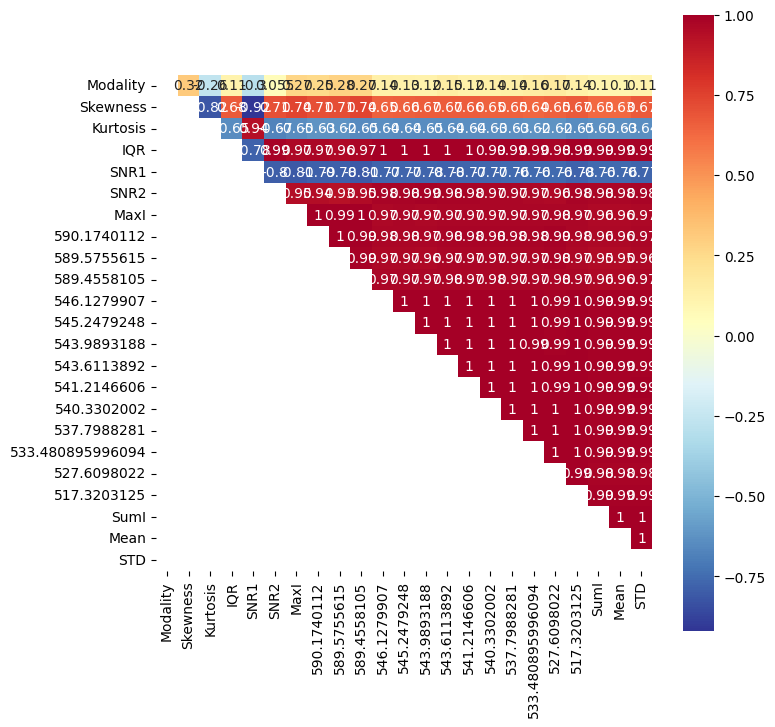

In [14]:
X_corr=X.corr().where(np.triu(np.ones(X.corr().shape), k=1).astype(bool))
plt.figure(figsize=(8, 8))
sns.heatmap(X_corr, cmap="RdYlBu_r", square=True, annot=True);

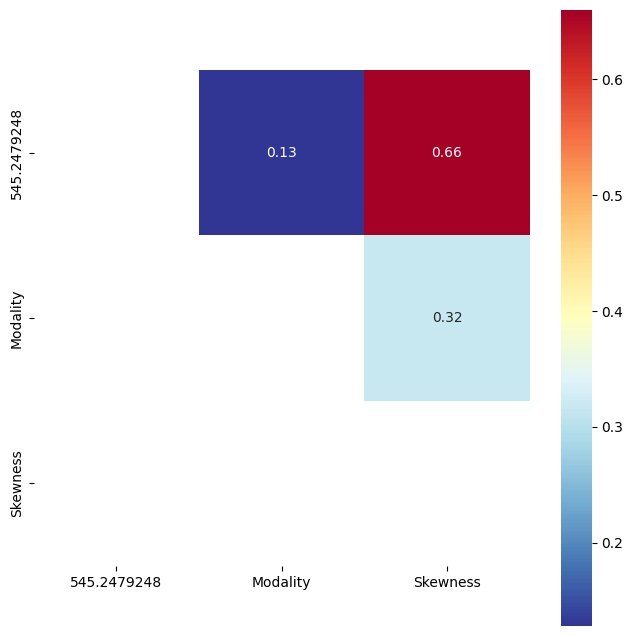

In [18]:
X_new=X[['545.2479248','Modality','Skewness']]
X_corr_new=X_new.corr().where(np.triu(np.ones(X_new.corr().shape), k=1).astype(bool))
plt.figure(figsize=(8, 8))
sns.heatmap(X_corr_new, cmap="RdYlBu_r", square=True, annot=True);

In [20]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

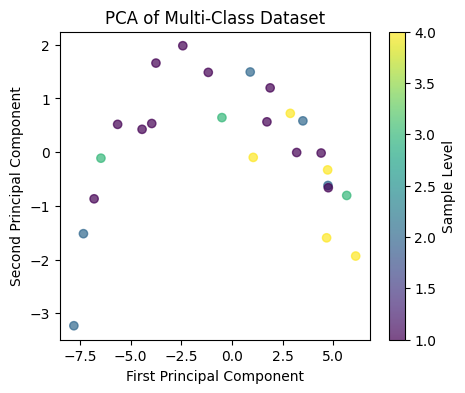

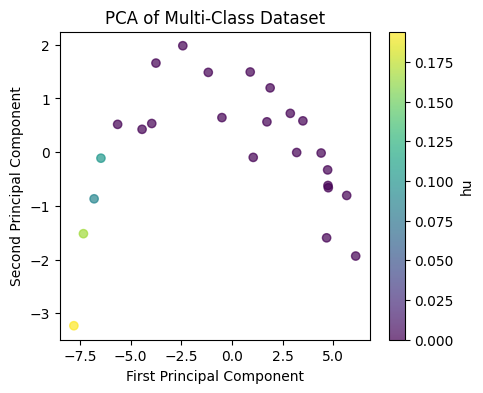

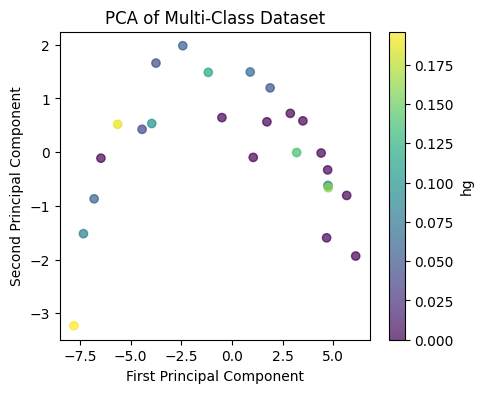

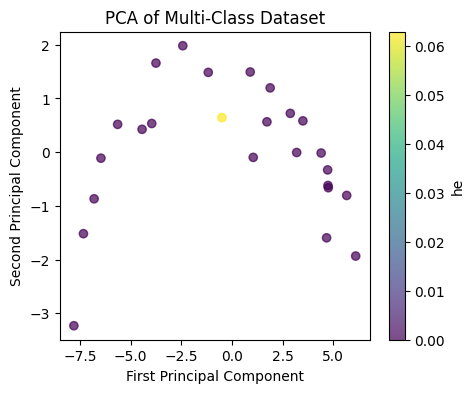

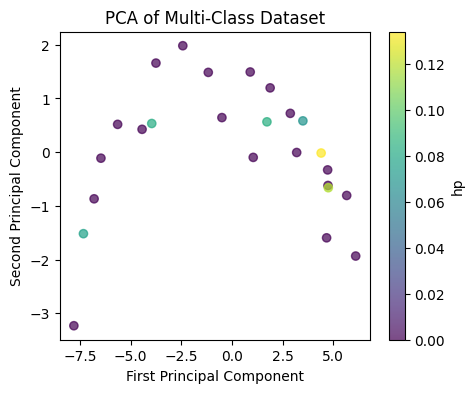

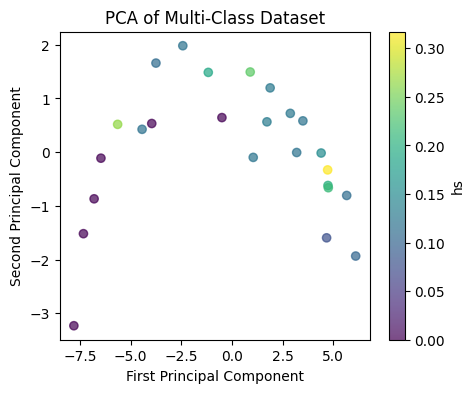

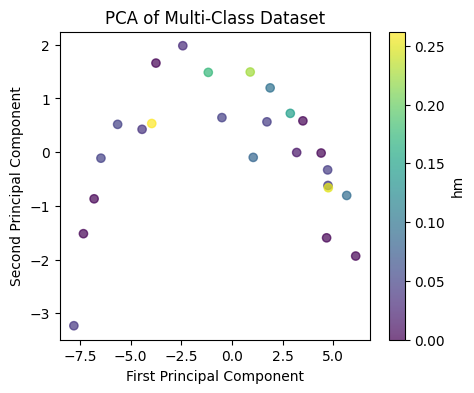

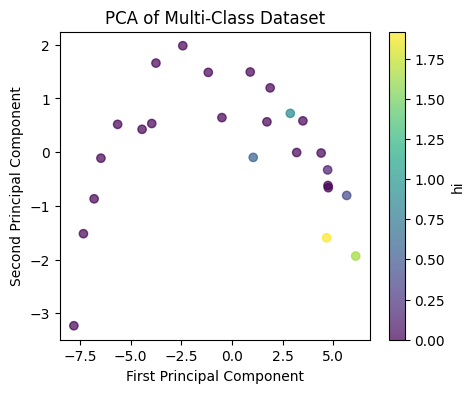

In [21]:
for column_name, column_data in y_combined.items():
  plt.figure(figsize=(5, 4))
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=column_data, cmap='viridis', alpha=0.7)
  plt.title('PCA of Multi-Class Dataset')
  plt.xlabel('First Principal Component')
  plt.ylabel('Second Principal Component')
  plt.colorbar(scatter, label=column_name)
  plt.show()


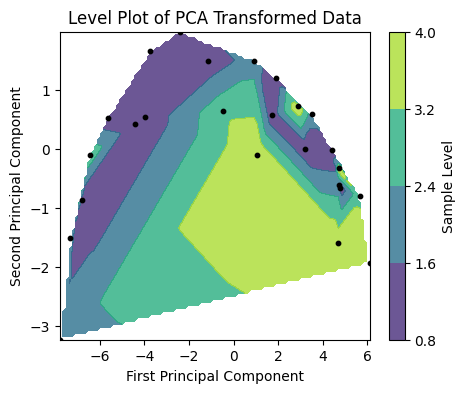

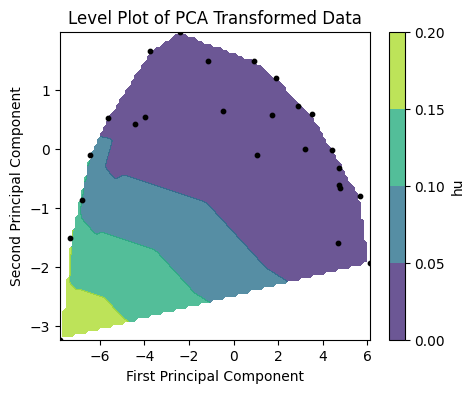

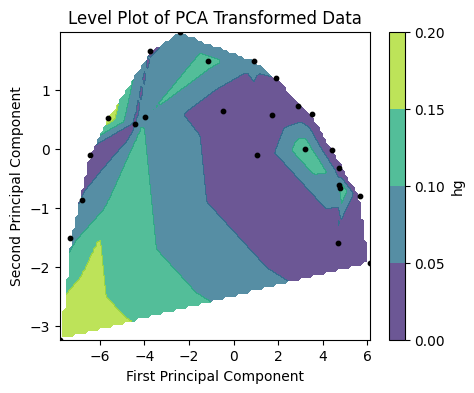

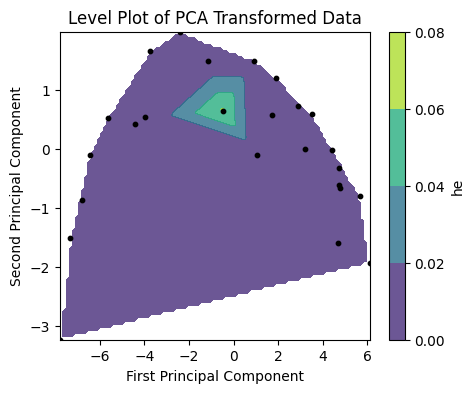

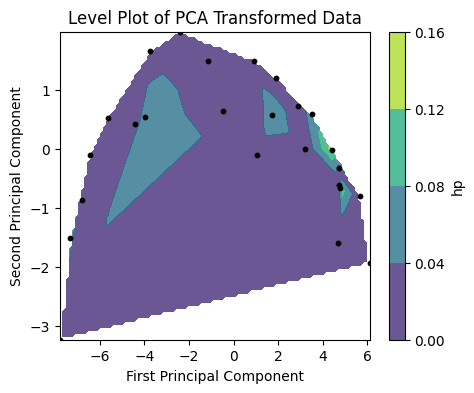

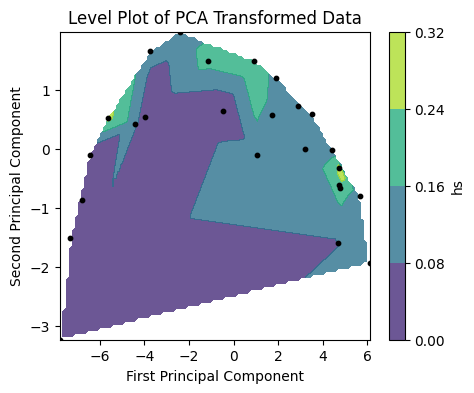

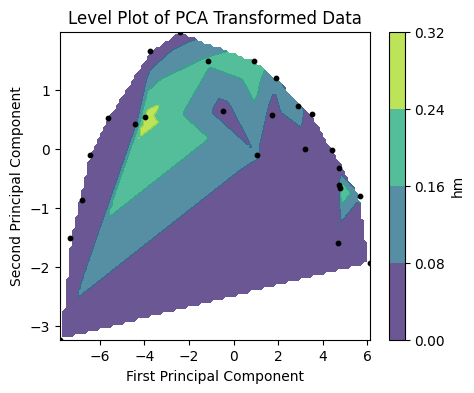

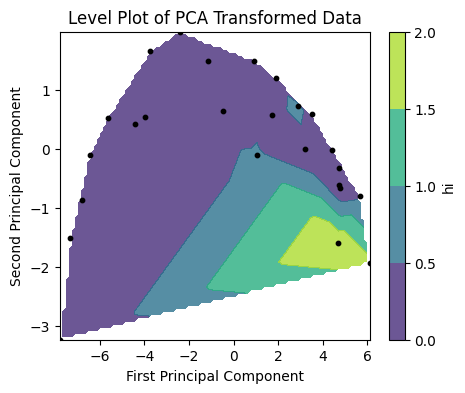

In [22]:
 for column_name, column_data in y_combined.items():
  x = X_pca[:, 0]
  y = X_pca[:, 1]
  z = column_data  # This could be any continuous variable you want to visualize
  grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

  # Interpolate z values on the grid
  grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')

  # Create level plot
  plt.figure(figsize=(5, 4))
  contour = plt.contourf(grid_x, grid_y, grid_z, levels=3, cmap='viridis', alpha=0.8)
  plt.colorbar(contour, label=column_name)
  plt.scatter(x, y, c='black', s=10)  # Scatter original data points on top
  plt.title('Level Plot of PCA Transformed Data')
  plt.xlabel('First Principal Component')
  plt.ylabel('Second Principal Component')
  plt.show()